In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix


In [102]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [103]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [104]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [105]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [106]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 digits
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:
model.fit(X_train, y_train_cat, epochs=2, batch_size=128, validation_split=0.1)

Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9805 - loss: 0.0653 - val_accuracy: 0.9875 - val_loss: 0.0445
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.9877 - loss: 0.0405 - val_accuracy: 0.9900 - val_loss: 0.0359


In [110]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9835 - loss: 0.0468
Test Accuracy: 98.69%


In [111]:
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


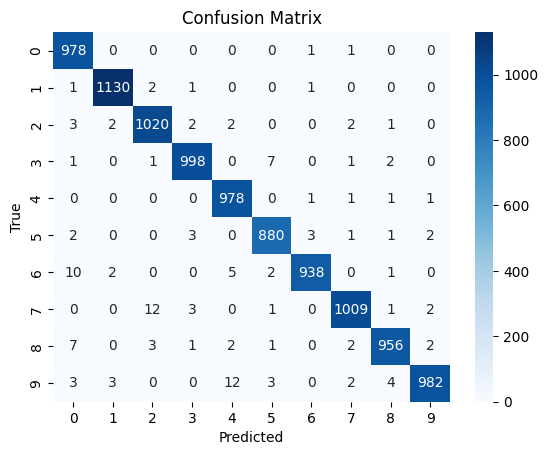

In [112]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()